## Cat qubits

In [3]:
pip install git+https://github.com/QuantumETS/pennylane-alice-bob.git@main

  Cloning https://github.com/QuantumETS/pennylane-alice-bob.git (to revision main) to /tmp/pip-req-build-f7owf8m8
  Running command git clone --filter=blob:none --quiet https://github.com/QuantumETS/pennylane-alice-bob.git /tmp/pip-req-build-f7owf8m8
  Resolved https://github.com/QuantumETS/pennylane-alice-bob.git to commit d96962a1b0ef27b486e4905d19f4d2ab0abc3131
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qiskit-ibm-provider to determine which version is compatible with other requirements. This could take a while.
  Using cached websocket_client-1.7.0-py3-none-any.whl.metadata (7.9 kB)
INFO: pip is looking at multiple versions of qiskit-ibm-runtime to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 26.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... d

In [ ]:
from qiskit_alice_bob_provider import AliceBobLocalProvider
from qiskit import QuantumCircuit, execute, transpile

provider = AliceBobLocalProvider()
print(provider.backends())
# EMU:6Q:PHYSICAL_CATS, EMU:40Q:PHYSICAL_CATS, EMU:1Q:LESCANNE_2020

[<ProcessorSimulator(name=EMU:6Q:PHYSICAL_CATS)>, <ProcessorSimulator(name=EMU:40Q:PHYSICAL_CATS)>, <ProcessorSimulator(name=EMU:40Q:LOGICAL_TARGET)>, <ProcessorSimulator(name=EMU:15Q:LOGICAL_EARLY)>, <ProcessorSimulator(name=EMU:1Q:LESCANNE_2020)>]


## Grover

Using alice & bob EMU:15Q:LOGICAL_EARLY backend...


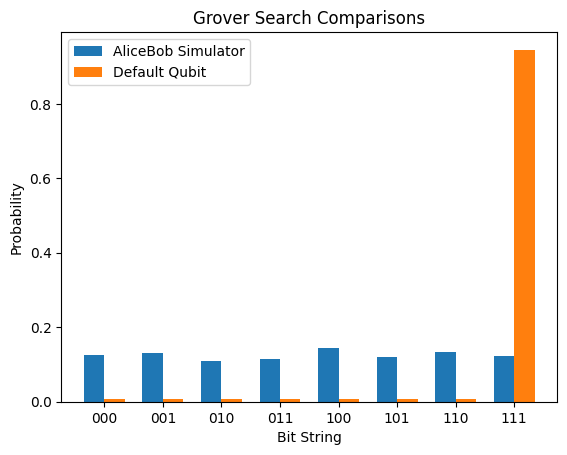

In [6]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Defining the oracle and the GroverSearch function
n_wires = 3
wires = list(range(n_wires))

def oracle():
    qml.Hadamard(wires[-1])
    qml.Toffoli(wires=wires)
    qml.Hadamard(wires[-1])

def GroverSearch(device, num_iterations=1):
    dev = device
    
    @qml.qnode(dev)
    def circuit():
        for wire in wires:
            qml.Hadamard(wire)

        for _ in range(num_iterations):
            oracle()
            qml.templates.GroverOperator(wires=wires)
        return qml.probs(wires)
    
    return circuit()

# Devices
alice_bob_dev = qml.device("alicebob.qubit", alice_backend="EMU:15Q:LOGICAL_EARLY", wires=3, average_nb_photons=4, kappa_2=1e4)
default_dev = qml.device("default.qubit", wires=3)

# Getting results from both devices
alicebob_results = GroverSearch(alice_bob_dev, num_iterations=2)
default_results = GroverSearch(default_dev, num_iterations=2)

# Generating bit strings for x-axis labels
bit_strings = [f"{x:0{n_wires}b}" for x in range(2**n_wires)]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(alicebob_results))

bar1 = ax.bar(index, alicebob_results, bar_width, label='AliceBob Simulator')
bar2 = ax.bar(index + bar_width, default_results, bar_width, label='Default Qubit')

ax.set_xlabel('Bit String')
ax.set_ylabel('Probability')
ax.set_title('Grover Search Comparisons')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(bit_strings)
ax.legend()

plt.show()